# Yash Agarwal
# Grip Task 6 Decession Tree

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
df=pd.read_csv("Iris.csv")
df.drop(columns=['Id'],inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [67]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.isna().any() # checking for null values in dataset

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

## Visualizaing data

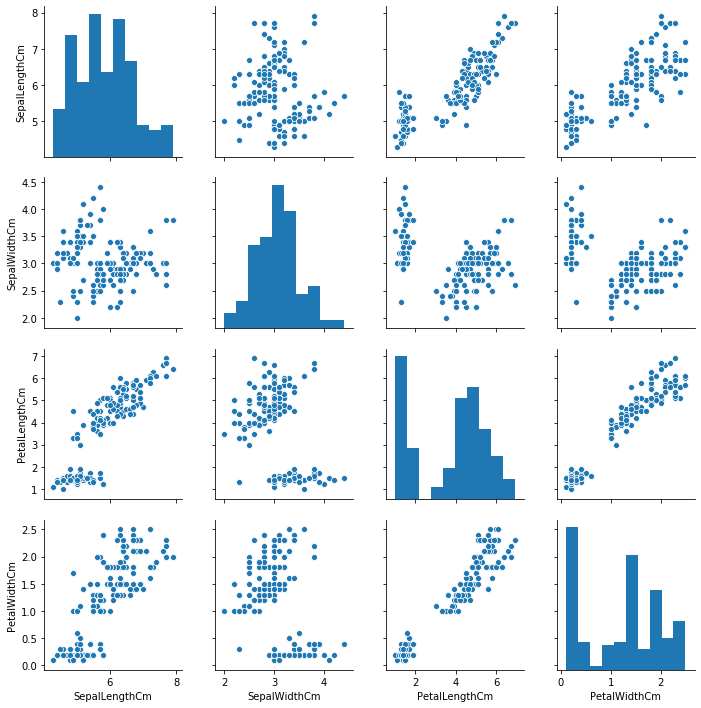

In [5]:
sns.pairplot(df)

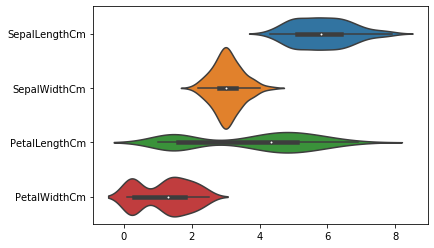

In [6]:
sns.violinplot(data=df, orient="h",width=1.5)

In [9]:
df_corr = df.corr()
df_corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


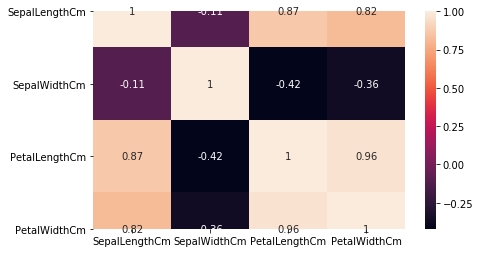

In [68]:
plt.figure(figsize=(7,4))
sns.heatmap(df_corr,annot=True)
plt.show()

## Training model

In [40]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2)

In [43]:
x_train = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_train = train.Species
x_test  = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_test  = test.Species

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy of the Decision Tree is ',metrics.accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is  0.9333333333333333


## Visualizing Decession Tree

In [58]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_2 <= 2.60
|   |--- class: Iris-setosa
|--- feature_2 >  2.60
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- class: Iris-versicolor
|   |--- feature_3 >  1.75
|   |   |--- class: Iris-virginica



[Text(465.0, 815.4, 'petal length (cm) <= 2.6\ngini = 0.666\nsamples = 120\nvalue = [42, 38, 40]\nclass = setosa'),
 Text(348.75, 634.2, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]\nclass = setosa'),
 Text(581.25, 634.2, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 78\nvalue = [0, 38, 40]\nclass = virginica'),
 Text(465.0, 453.0, 'petal length (cm) <= 4.95\ngini = 0.172\nsamples = 42\nvalue = [0, 38, 4]\nclass = versicolor'),
 Text(232.5, 271.80000000000007, 'petal width (cm) <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(116.25, 90.60000000000002, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(348.75, 90.60000000000002, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(697.5, 271.80000000000007, 'petal width (cm) <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = virginica'),
 Text(581.25, 90.60000000000002, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(81

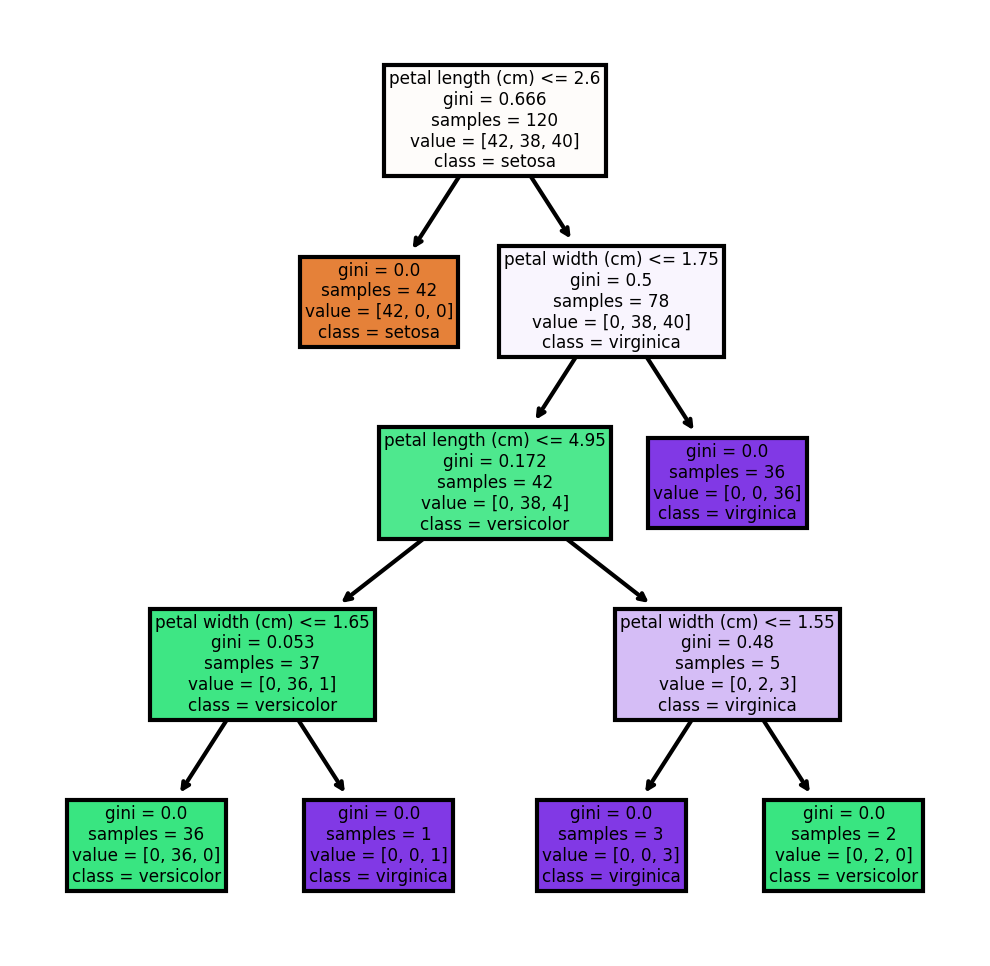

In [49]:
from sklearn import tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model, feature_names=fn,class_names=cn,filled=True)

## Making Prediction

In [63]:
def make_prediction(model):
    sepal_length=float(input("Enter the sepal length "))
    sepal_width=float(input("Enter the sepal width "))
    petal_length=float(input("Enter the petal length "))
    petal_width=float(input("Enter the petal width "))
    input_array=[[sepal_length,sepal_width,petal_length,petal_width]]
    prediction=model.predict(input_array)
    print("The flower belongs to class {}".format(prediction[0]))

In [64]:
make_prediction(model)

Enter the sepal length 5.6
Enter the sepal width 7.5
Enter the petal length 2.3
Enter the petal width 5.5
The flower belongs to class Iris-setosa
